# During COVID-19 Crisis Death Toll in Istanbul

## The Motivation

    Basically, when i started this study i have 2 motivations: On of them is claims of oppenents and the other was if the COVID-19 has any indirect effect on death toll in Istanbul.

    Hiding the real COVID-19 related data is one of the main discussions among opponents of the current government in Turkey. Although the government publicize the daily data at the end od each day, many believe that the numbers are not real.

    Regarding the second motivation I expected a minor increase because of the indirect effect of COVID-19 on death toll in Istanbul. Many patients do not go to hospital because of the fear of infected with COVID-19. Unfortuntely I expected the situations some of them become severe and they may die because of indirect effect of COVID-19.

    Deceased Records Querying is one of the online services provided by the local authorities at https://www.turkiye.gov.tr/belediyeler. For this study, i worked only on the data of Istanbul which is the most crowded city in Turkey.

<img src="turkiye.gov.tr.png" width=50% height=50%/>

    By providing a particular date (image on the right above), from this platform a deceased person's date of birth, date of death, reason for death, first and last name, and father name could be extracted until the end of March. However, the government limited the data after some discussions for the reason for death. Now, only the name of deceased person and the date of death (also city) are available.

    When I started this study, after googling it I realized a very similar study is done but at that time the results are not very obvious. From https://gist.github.com/oztalha/8df9e8e47d5a39d4378bf2f98a11d55f you can have a look at what was done and by the time of this study the above mentioned data (date of birth, date of death, reason for death, first and last name, and father name) was available. For my study I also used the same webscraping code by some modifications which is also available at https://github.com/ysncbk/webscrapping-turkiye.gov.tr.

## Data

    Most of the discussions in Turkey about COVID-19 started at the beginnig of the February. That is why 01.02.2020/2019/2018/2017-12.04.2020/2019/2018/2017 time interval is selected for the analysis.
    After the first plot, I decided to divide the data into two parts and analyze them seperately and then to compare the results. First part of the data includes February 1-March 10 time interval and the second part of data contains 11 March-12 April time interval. The reason for the division, as can be seen from the below first image, the death toll at 10 March 2020 starts to differentiate from previous 3 years.

# Methodology

    One important point is that 2020 is a leap year but previous 3 years are not. For the sake of simplicity, I excluded February 29. Some nasty coding arrangements were done for this adjustment. In this analysis I wanted compare the data of the 2020 with maximum/medium values of previous three years for each day. For Example: The maximum or medium value for March 3 is calculated in 2017-2019 time interval and was compared with 3 March 2020. 

#  Findings and Discussion

    Turkey confirmed its first death from the coronavirus on 18.03.2020, according to its health minister. By the April 12 (the last date of data used in this study), the death toll because of Coronavirus in Turkey was 1198.

<img src="COVID-19.jpg" width=40% height=40%/>

    Unfortunately, according to findings of this study the cumulative sum of death toll differences in Istanbul was significantly different from total death toll in Turkey.
     It is obvious that March 10 is a breaking point. After this date, death toll in Istanbul started to increase significantly from previous years. There could be many reasons for this situation:
    -Claims of opponents (the government hides the real numbers)
    -Indirect effect of the COVID-19 (many patients do not go to hospital because of the fear of being infected with COVID-19 but the situation becomes severe and unfortuntely they pass away)
    -False COVID-19 test identification. Although many people are infected with the virus, their death reason is falsely identified.
    - or others...
    One of the interesting results in this study is that death toll in istanbul between 01.02.2020 - 10.03.2020 time interval is lower than both maximum and median values of previous 3 years. Although it was lower until March 10, then something triggers the number of deaths to significantly differ from normal values.
    Even if these deaths are not originated from COVID-19, the reasons for this situation should be analyzed carefully and precautions should be taken to prevent this anomaly.

# Analysis

In [2]:
import pandas as pd
#Read the data
df = pd.read_csv('istanbul_deathtoll_data.csv',parse_dates=['Ölüm Tarihi'])
df.head()

,Adı Soyadı,Baba Adı,Doğum Tarihi,Yaşı,Ölüm Sebebi,Ölüm Tarihi,city
0,ABDO BAZAR,NaN,NaN,NaN,NaN,2017-02-01,istanbul
1,ABİDİN KAYHAN,NaN,NaN,NaN,NaN,2017-02-01,istanbul
2,ABUZER ORAL,NaN,NaN,NaN,NaN,2017-02-01,istanbul
3,ADNAN KÖPRÜ,NaN,NaN,NaN,NaN,2017-02-01,istanbul
4,AHMET ARAT,NaN,NaN,NaN,NaN,2017-02-01,istanbul


In [3]:
df.tail()

,Adı Soyadı,Baba Adı,Doğum Tarihi,Yaşı,Ölüm Sebebi,Ölüm Tarihi,city
63573,ZAHİRE ÇELİK,NaN,NaN,NaN,NaN,2020-04-12,istanbul
63574,ZAKİR DEMİREL,NaN,NaN,NaN,NaN,2020-04-12,istanbul
63575,ZEHRA ACUN,NaN,NaN,NaN,NaN,2020-04-12,istanbul
63576,ZİNNUR AKÇAY,NaN,NaN,NaN,NaN,2020-04-12,istanbul
63577,ZÜLEYHA PEHLİVAN,NaN,NaN,NaN,NaN,2020-04-12,istanbul


In [4]:
#The number of deaths per day of the year
counts = df.groupby(df['Ölüm Tarihi']).size()
counts.index.name = 'dt'
counts = counts.reset_index(name='cnt')
counts['doy'] = counts.dt.dt.dayofyear
counts = counts[counts.dt.dt.dayofyear < 104]
counts

,dt,cnt,doy
0,2017-02-01,211,32
1,2017-02-02,236,33
2,2017-02-03,212,34
3,2017-02-04,249,35
4,2017-02-05,227,36
...,...,...,...
280,2020-04-08,338,99
281,2020-04-09,320,100
282,2020-04-10,321,101
283,2020-04-11,311,102


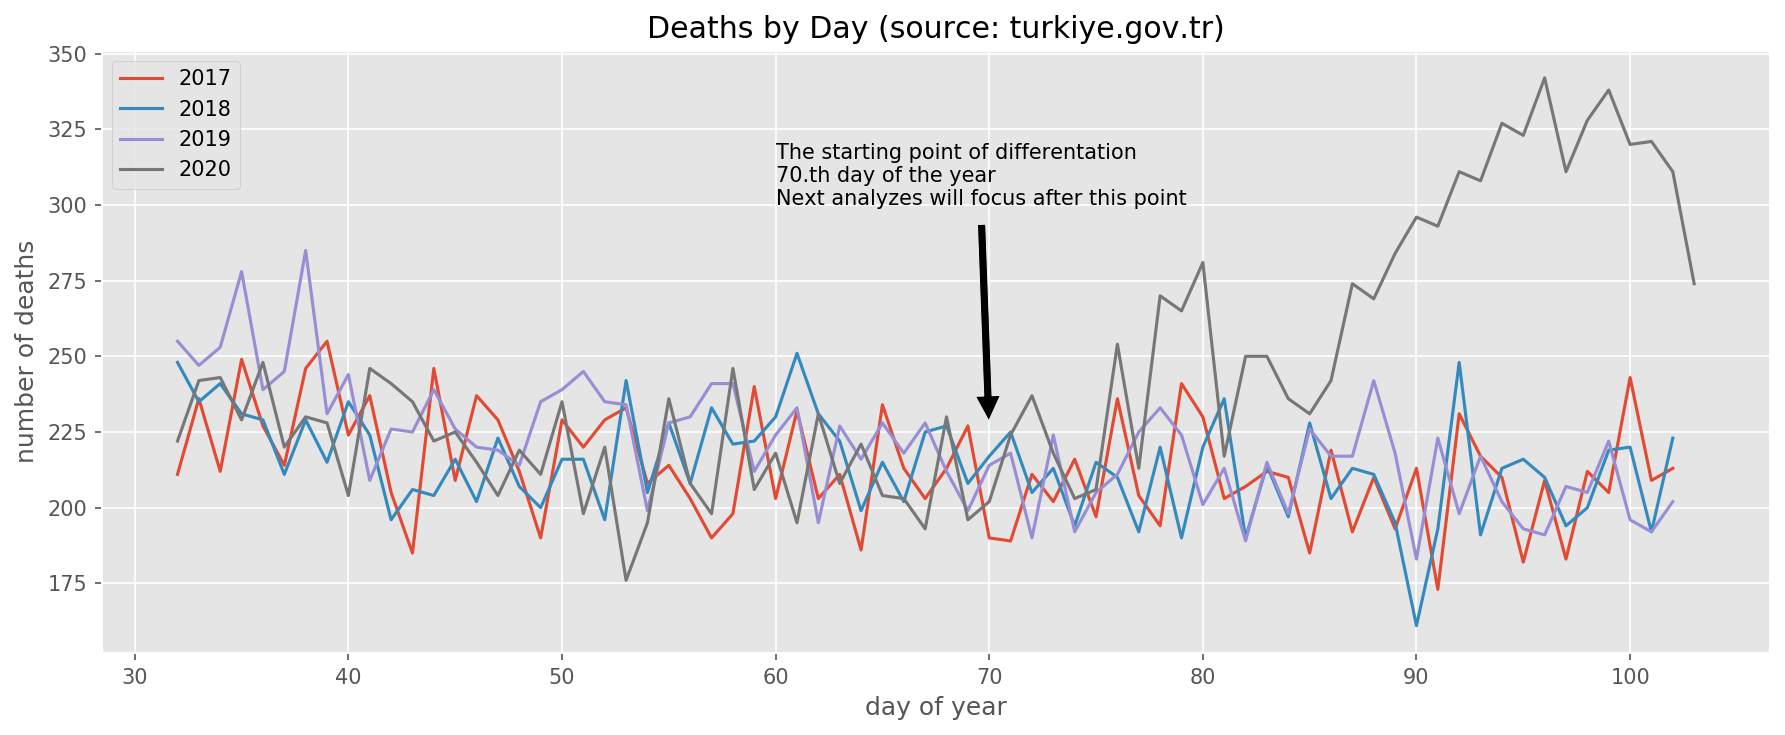

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
plt.style.use('ggplot')
import seaborn as sns
mpl.rcParams['savefig.dpi'] = 150
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['figure.figsize'] = 12, 5
mpl.rcParams['axes.formatter.useoffset']=False
mpl.rcParams['figure.autolayout']=True


annotation_string = r"""The starting point of differentation
70.th day of the year
Next analyzes will focus after this point"""
by = counts.dt.dt.year
counts.groupby(by).apply(lambda x: plt.plot(x.doy,x.cnt,label=x.name))
ax = plt.gca()
ax.set(xlabel='day of year',
       ylabel='number of deaths',
       title='Deaths by Day (source: turkiye.gov.tr)')
ax.annotate(annotation_string, xy=(70, 225), xytext=(60, 300),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.legend();


From the plot, we can divide the data to two by 70.th day of the year. Because, the number of deaths in 2020 seems to change after 70.th day. The first significant peak can be observed after 70. th day of the year. 70. th day of the year is March 11 for non-leap year.

In [6]:
counts_filt = counts[counts.doy>=70]

In [7]:
#Filter the data
cts_2020 = counts_filt[counts_filt.dt.dt.year==2020]
cts_2020 = cts_2020.drop(cts_2020.index[0])# Drop March 10
                                              #in 2020 February has 29 days

cts_2020.set_index('dt', inplace=True)
cts_1719= counts_filt[counts_filt.dt.dt.year!=2020]
cts_1719.set_index('dt', inplace=True)

In [8]:
#Find Median and Max of previous three years per day of the year after 11.th March

med_1719=cts_1719.groupby([cts_1719.doy]).median()
max_1719=cts_1719.groupby([cts_1719.doy]).max()


In [12]:
#Create date range
from datetime import datetime
x_values=[datetime(2020,3,i+11) for i in range(21)]+[datetime(2020,4,i+1) for i in range(12)]


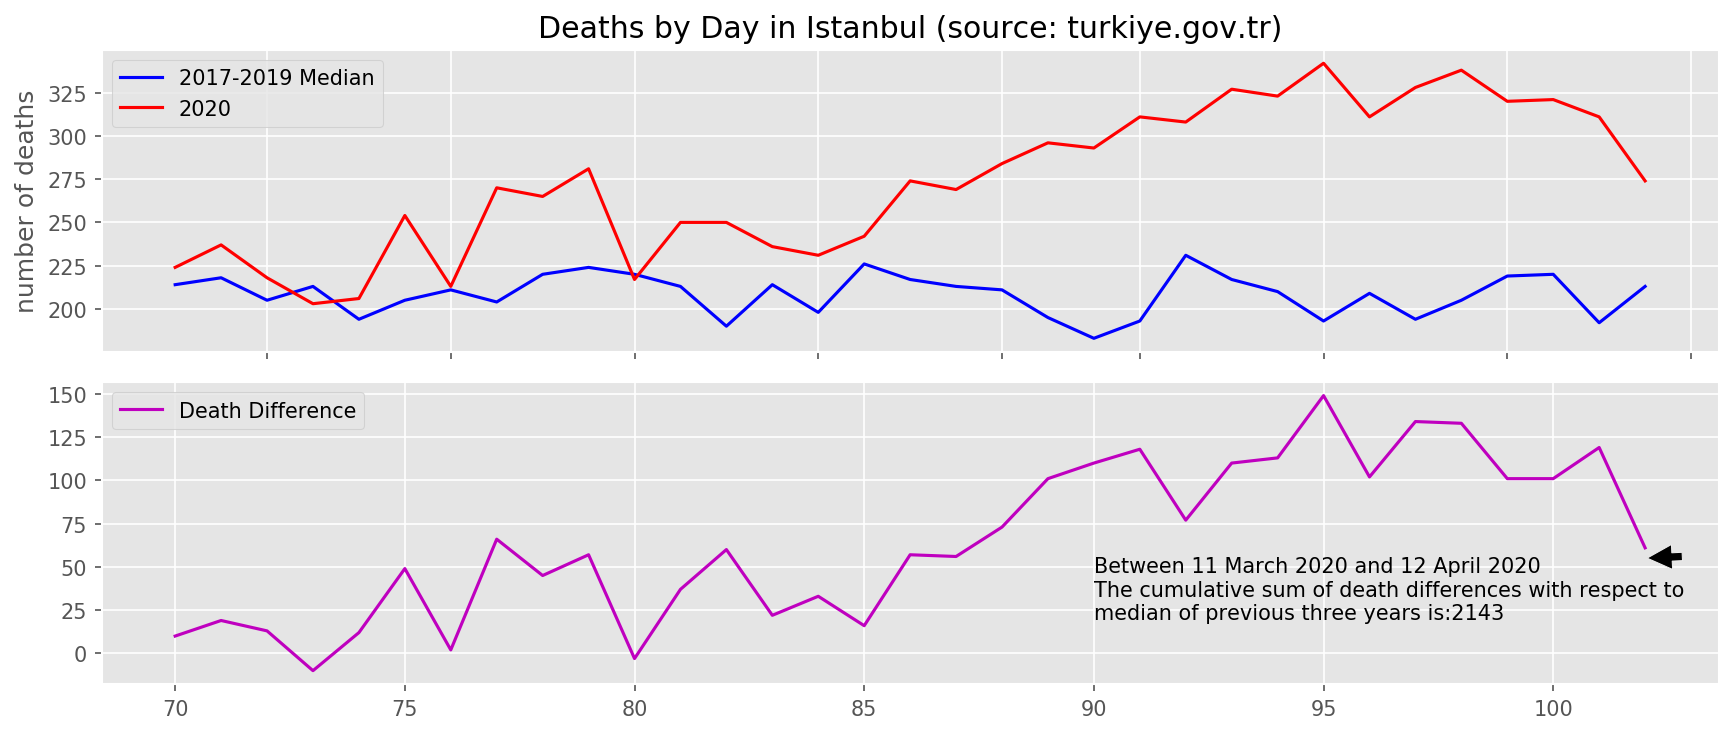

In [14]:
#Plotting with median
plt.figure()
ax1 = plt.subplot(211)
ax1.plot(x_values,med_1719.cnt,'b', label='2017-2019 Median')
ax1.plot(x_values,cts_2020.cnt,'r', label='2020' )
ax = plt.gca()
ax.set(ylabel='number of deaths', 
       title='Deaths by Day in Istanbul (source: turkiye.gov.tr)')
ax.legend();

dif=[sum(i) for i in zip(cts_2020.cnt, -med_1719.cnt)]
dif = pd.DataFrame(dif, columns = ['Difference']) 
cumsum = dif.cumsum(skipna = False) 
cumulativesum=cumsum.Difference.iloc[-1]

annotation_string = r"""Between 11 March 2020 and 12 April 2020
The cumulative sum of death differences with respect to
median of previous three years is:{0}""".format(cumulativesum)
ax2 = plt.subplot(212)
ax2.plot(med_1719.index.values, dif,'m', label='Death Difference')
ax = plt.gca()
ax.annotate(annotation_string, xy=(102, 55), xytext=(90, 20),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.legend();
ax1.get_shared_x_axes().join(ax1, ax2)
ax1.set_xticklabels([])

plt.show()


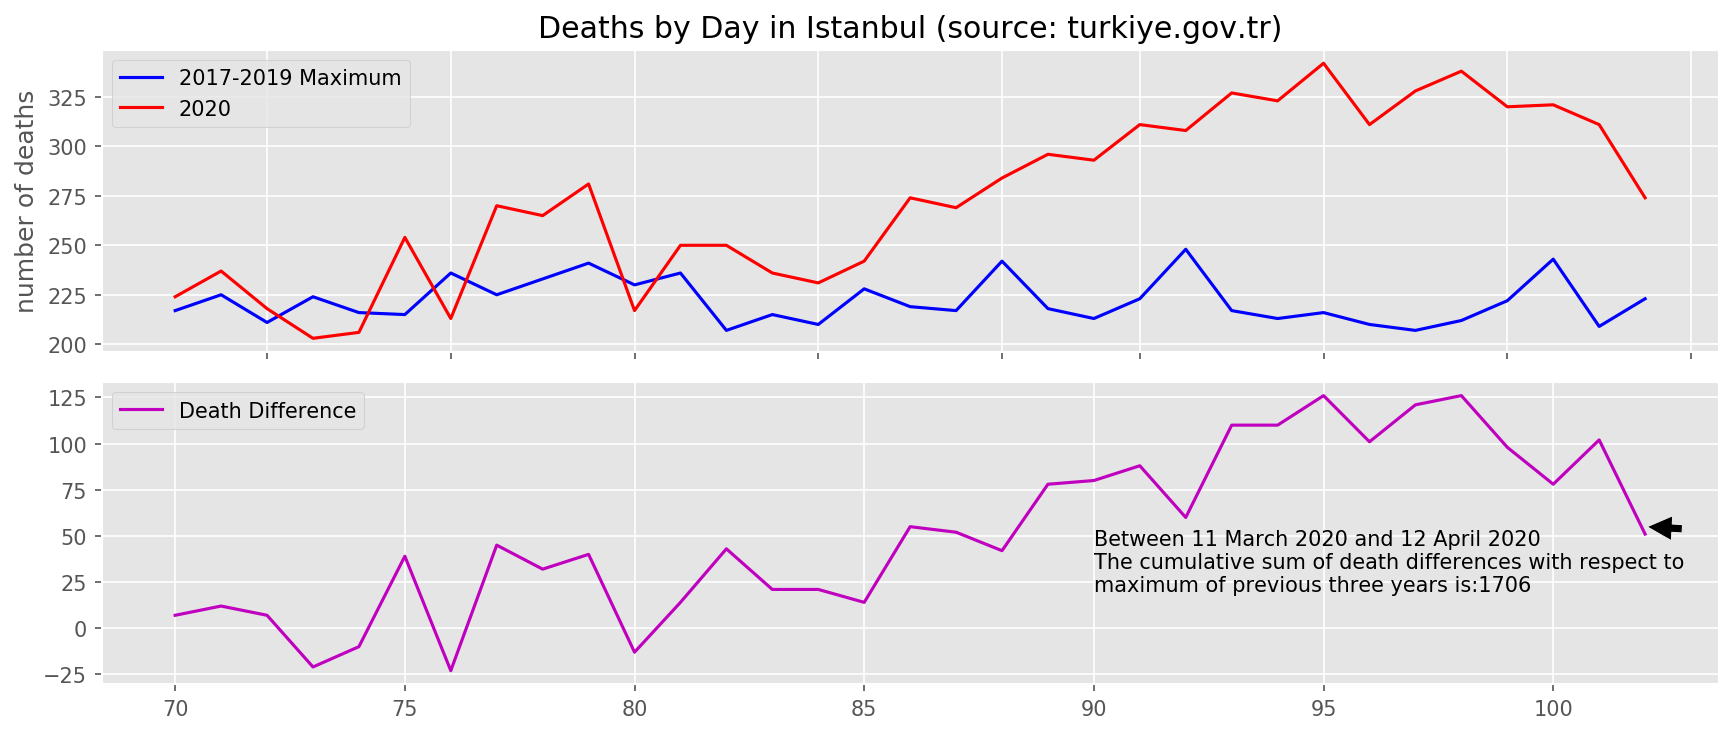

In [15]:
#Plotting with maximum
plt.figure()
ax1 = plt.subplot(211)
ax1.plot(x_values,max_1719.cnt,'b', label='2017-2019 Maximum')
ax1.plot(x_values,cts_2020.cnt,'r', label='2020' )
ax = plt.gca()
ax.set(ylabel='number of deaths', 
       title='Deaths by Day in Istanbul (source: turkiye.gov.tr)')
ax.legend();

dif=[sum(i) for i in zip(cts_2020.cnt, -max_1719.cnt)]
dif = pd.DataFrame(dif, columns = ['Difference']) 
cumsum = dif.cumsum(skipna = False) 
cumulativesum=cumsum.Difference.iloc[-1]

annotation_string = r"""Between 11 March 2020 and 12 April 2020
The cumulative sum of death differences with respect to
maximum of previous three years is:{0}""".format(cumulativesum)
ax2 = plt.subplot(212)
ax2.plot(max_1719.index.values, dif,'m', label='Death Difference')
ax = plt.gca()
ax.annotate(annotation_string, xy=(102, 55), xytext=(90, 20),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.legend();
ax1.get_shared_x_axes().join(ax1, ax2)
ax1.set_xticklabels([])
plt.show()


# The same methodology for 01.02-10.03 time interval

In [16]:
counts_filt = counts[counts.doy<71]

#Compare 2020 with previous years

#Filter the data
cts_2020 = counts_filt[counts_filt.dt.dt.year==2020]
cts_2020 = cts_2020[cts_2020.doy != 60]# drop February 29

cts_1719= counts_filt[counts_filt.dt.dt.year!=2020]
cts_1719 = cts_1719[cts_1719.doy != 70]# drop 11 March due to 29 February adjestments

cts_2020.set_index('dt', inplace=True)

cts_1719.set_index('dt', inplace=True)

#Adjust doy for 2020
cts_2020.insert(0, 'new_doy', range(32, 32 + len(cts_2020)))

#Find Median and Max of previous three years per day of the year after 11.th March

med_1719=cts_1719.groupby([cts_1719.doy]).median()
max_1719=cts_1719.groupby([cts_1719.doy]).max()


#Create date calues instead of day of the year
x_values=[datetime(2020,2,i+1) for i in range(28)]+[datetime(2020,3,i+1) for i in range(10)]



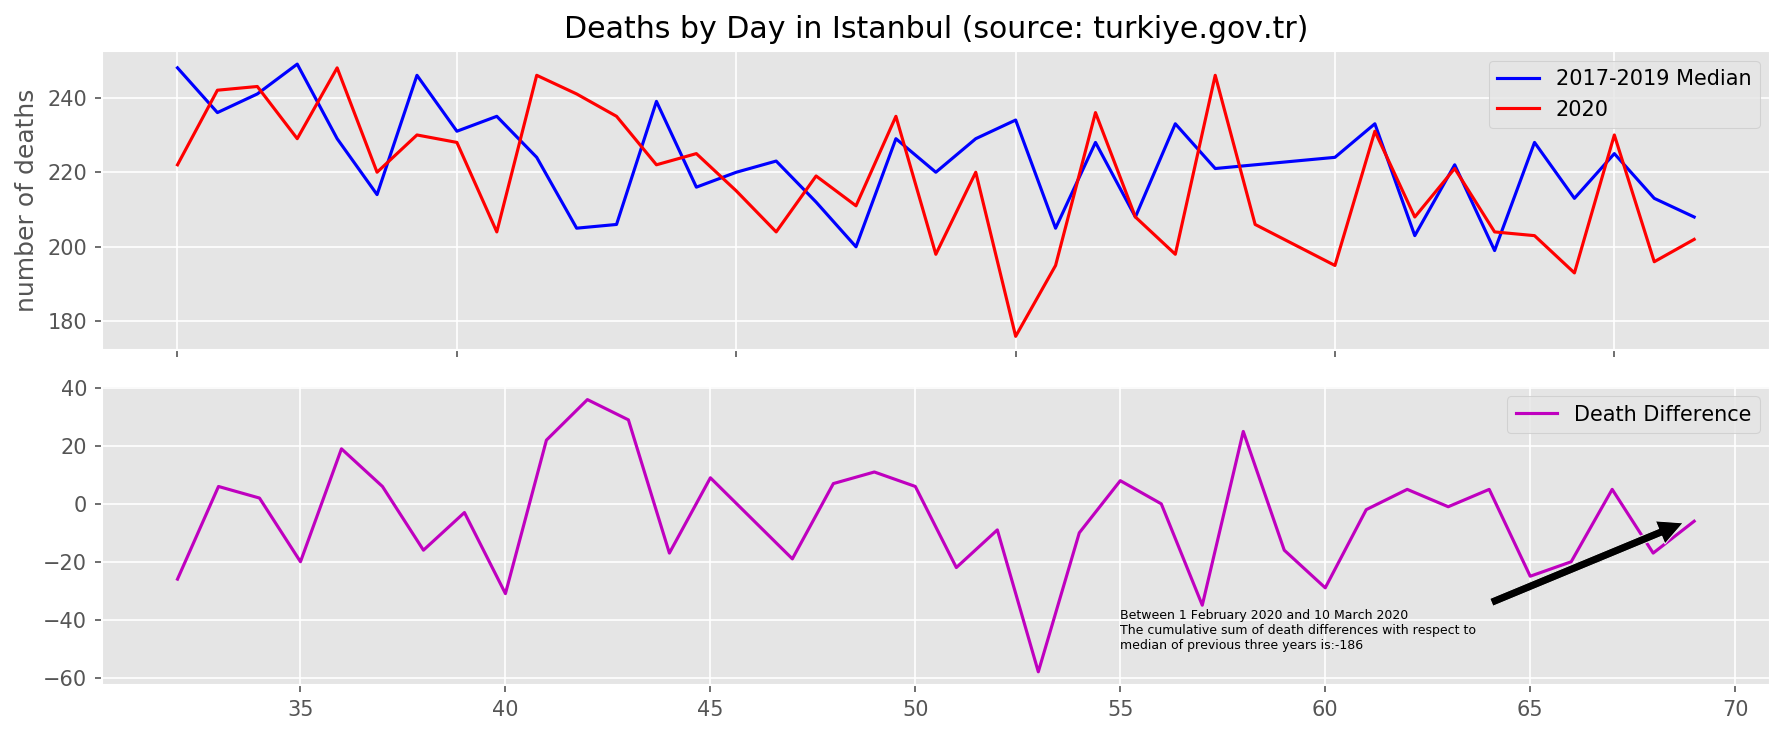

In [17]:
#Plotting with median
plt.figure()
ax1 = plt.subplot(211)
ax1.plot(x_values,med_1719.cnt,'b', label='2017-2019 Median')
ax1.plot(x_values,cts_2020.cnt,'r', label='2020' )
ax = plt.gca()
ax.set(ylabel='number of deaths', 
       title='Deaths by Day in Istanbul (source: turkiye.gov.tr)')
ax.legend();

dif=[sum(i) for i in zip(cts_2020.cnt, -med_1719.cnt)]
dif = pd.DataFrame(dif, columns = ['Difference']) 
cumsum = dif.cumsum(skipna = False) 
cumulativesum=cumsum.Difference.iloc[-1]

annotation_string = r"""Between 1 February 2020 and 10 March 2020
The cumulative sum of death differences with respect to
median of previous three years is:{0}""".format(cumulativesum)
ax2 = plt.subplot(212)
ax2.plot(med_1719.index.values, dif,'m', label='Death Difference')
ax = plt.gca()
ax.annotate(annotation_string, xy=(69, -5), xytext=(55, -50),
            arrowprops=dict(facecolor='black', shrink=0.05),fontsize=6,
            )
ax.legend();
ax1.get_shared_x_axes().join(ax1, ax2)
ax1.set_xticklabels([])
plt.show()

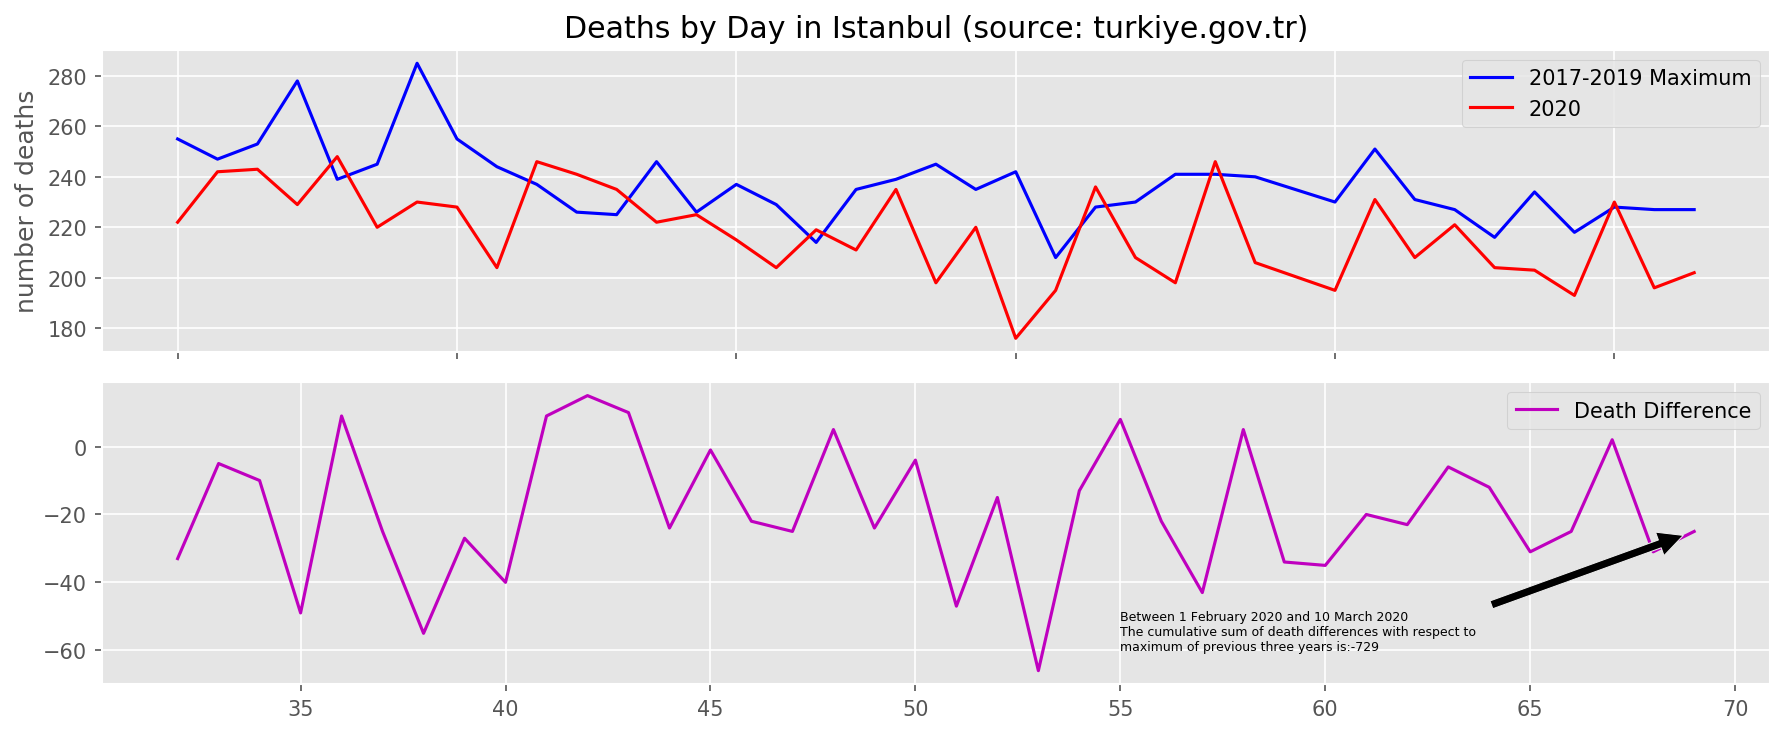

In [19]:

#Plotting with maximum
plt.figure()
ax1 = plt.subplot(211)
ax1.plot(x_values,max_1719.cnt,'b', label='2017-2019 Maximum')
ax1.plot(x_values,cts_2020.cnt,'r', label='2020' )
ax = plt.gca()
ax.set(ylabel='number of deaths', 
       title='Deaths by Day in Istanbul (source: turkiye.gov.tr)')
ax.legend();

dif=[sum(i) for i in zip(cts_2020.cnt, -max_1719.cnt)]
dif = pd.DataFrame(dif, columns = ['Difference']) 
cumsum = dif.cumsum(skipna = False) 
cumulativesum=cumsum.Difference.iloc[-1]

annotation_string = r"""Between 1 February 2020 and 10 March 2020
The cumulative sum of death differences with respect to
maximum of previous three years is:{0}""".format(cumulativesum)
ax2 = plt.subplot(212)
ax2.plot(max_1719.index.values, dif,'m', label='Death Difference')
ax = plt.gca()
ax.annotate(annotation_string, xy=(69, -25), xytext=(55, -60),
            arrowprops=dict(facecolor='black', shrink=0.05),fontsize=6,
            )
ax.legend();
ax1.get_shared_x_axes().join(ax1, ax2)
ax1.set_xticklabels([])

plt.show()